In [2]:
import numpy as np 
import pandas as pd

In [29]:
import os
for dirname, _, filenames in os.walk('E:\My Assignment\Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

E:\My Assignment\Dataset\ExistingHotels_CustomerVisitsdata-1554810038262.csv
E:\My Assignment\Dataset\hotel-reviews-recommended-system-segmentation.ipynb
E:\My Assignment\Dataset\NewHotels_CutstomerVisitsdata-1554810098964.csv
E:\My Assignment\Dataset\Test-1555730055539.csv
E:\My Assignment\Dataset\Train-1554810061973.csv
E:\My Assignment\Dataset\user_hotel_rating-1555730075105.csv


In [1]:
## Importing Tools
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from nltk.tokenize import word_tokenize, sent_tokenize 
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,adjusted_rand_score

from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline

In [27]:
## Reading and exploring on train data
train = pd.read_csv("E:/My Assignment/Dataset/Train-1554810061973.csv")
print(train.shape)
train.head()

(6287, 6)


,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment
0,Review_1,hotel_101,hotel_1608,"Nov 16, 2007",Nice Marriot View of my king bed room,good
1,Review_2,hotel_101,hotel_6939,"Oct 30, 2007","Good hotel, charges for internet access The Ma...",good
2,Review_3,hotel_101,hotel_3976,"Oct 12, 2007",Small but adequate rooms If you have an early ...,good
3,Review_4,hotel_101,hotel_2851,"Aug 31, 2007","Better than average, some noisy rooms I have s...",good
4,Review_5,hotel_101,hotel_7897,"Jul 18, 2007",Ordinary Although it is highly rated in these ...,bad


In [30]:
### Reading and exploring on test data
test = pd.read_csv("E:/My Assignment/Dataset/Test-1555730055539.csv")
print(test.shape)
test.head()

(3468, 5)


,Reviewid,Hotelid,userid,Date,reviewtext
0,Review_11001,hotel_101,hotel_2225,"Dec 13, 2008",Just An Average stay This was just an average ...
1,Review_11002,hotel_101,hotel_5079,"Dec 2, 2008",go elsewhere The place is hugely overpriced an...
2,Review_11003,hotel_101,hotel_8440,"Nov 18, 2008",I Won't Go Back I stayed at the hotel 11/14/08...
3,Review_11004,hotel_101,hotel_4592,"Oct 19, 2008",Good weekend stay My wife and I stay here quit...
4,Review_11005,hotel_101,hotel_5901,"Oct 13, 2008","Great airport stay Lovely indoor pool area, lo..."


In [31]:
### Reading and exploring on Existing hotels Data
exist = pd.read_csv("E:/My Assignment/Dataset/ExistingHotels_CustomerVisitsdata-1554810038262.csv")
print(exist.shape)
exist.head(3)

(7504, 15)


,Hotelid,userid,reviewtext,Date,NoOfReaders,HelpfulToNoOfreaders,Value_rating,Rooms_rating,Location_rating,Cleanliness_rating,Checkin_rating,Service_rating,Businessservice_rating,AverageOverallRatingOfHotel,AveragePricing
0,hotel_101,hotel_2225,Just An Average stay This was just an average ...,"Dec 13, 2008",0,0,4,4,1,4,4,4,3,3.5,$245
1,hotel_101,hotel_5079,go elsewhere The place is hugely overpriced an...,"Dec 2, 2008",0,0,2,4,3,3,1,2,2,3.5,$245
2,hotel_101,hotel_8440,I Won't Go Back I stayed at the hotel 11/14/08...,"Nov 18, 2008",0,0,2,4,3,4,2,3,1,3.5,$245


In [32]:
### Reading and exploring on New_hotels Data
New = pd.read_csv("E:/My Assignment/Dataset/NewHotels_CutstomerVisitsdata-1554810098964.csv")
print(New.shape)
New.head(2)

(2469, 15)


,Hotelid,userid,reviewtext,Date,NoOfReaders,HelpfulToNoOfreaders,Value_rating,Rooms_rating,Location_rating,Cleanliness_rating,Checkin_rating,Service_rating,Businessservice_rating,AverageOverallRatingOfHotel,AveragePricing
0,hotel_104,hotel_4342,Awesome Everything about this resort was great...,"Jan 5, 2009",0,0,6,6,6,6,6,6,6,4.0,$227
1,hotel_104,hotel_2024,Convenient When I say Above Average I'm compa...,"Nov 10, 2008",0,0,4,4,6,5,4,5,1,4.0,$227


In [9]:
#### Reading and exploring on User_ratings data¶
ratings = pd.read_csv("E:/My Assignment/Dataset/user_hotel_rating-1555730075105.csv")
print(ratings.shape)
ratings.head(2)

(271935, 3)


,userid,Hotelid,OverallRating
0,user_78131,hotel_558,3
1,user_78131,hotel_603,2


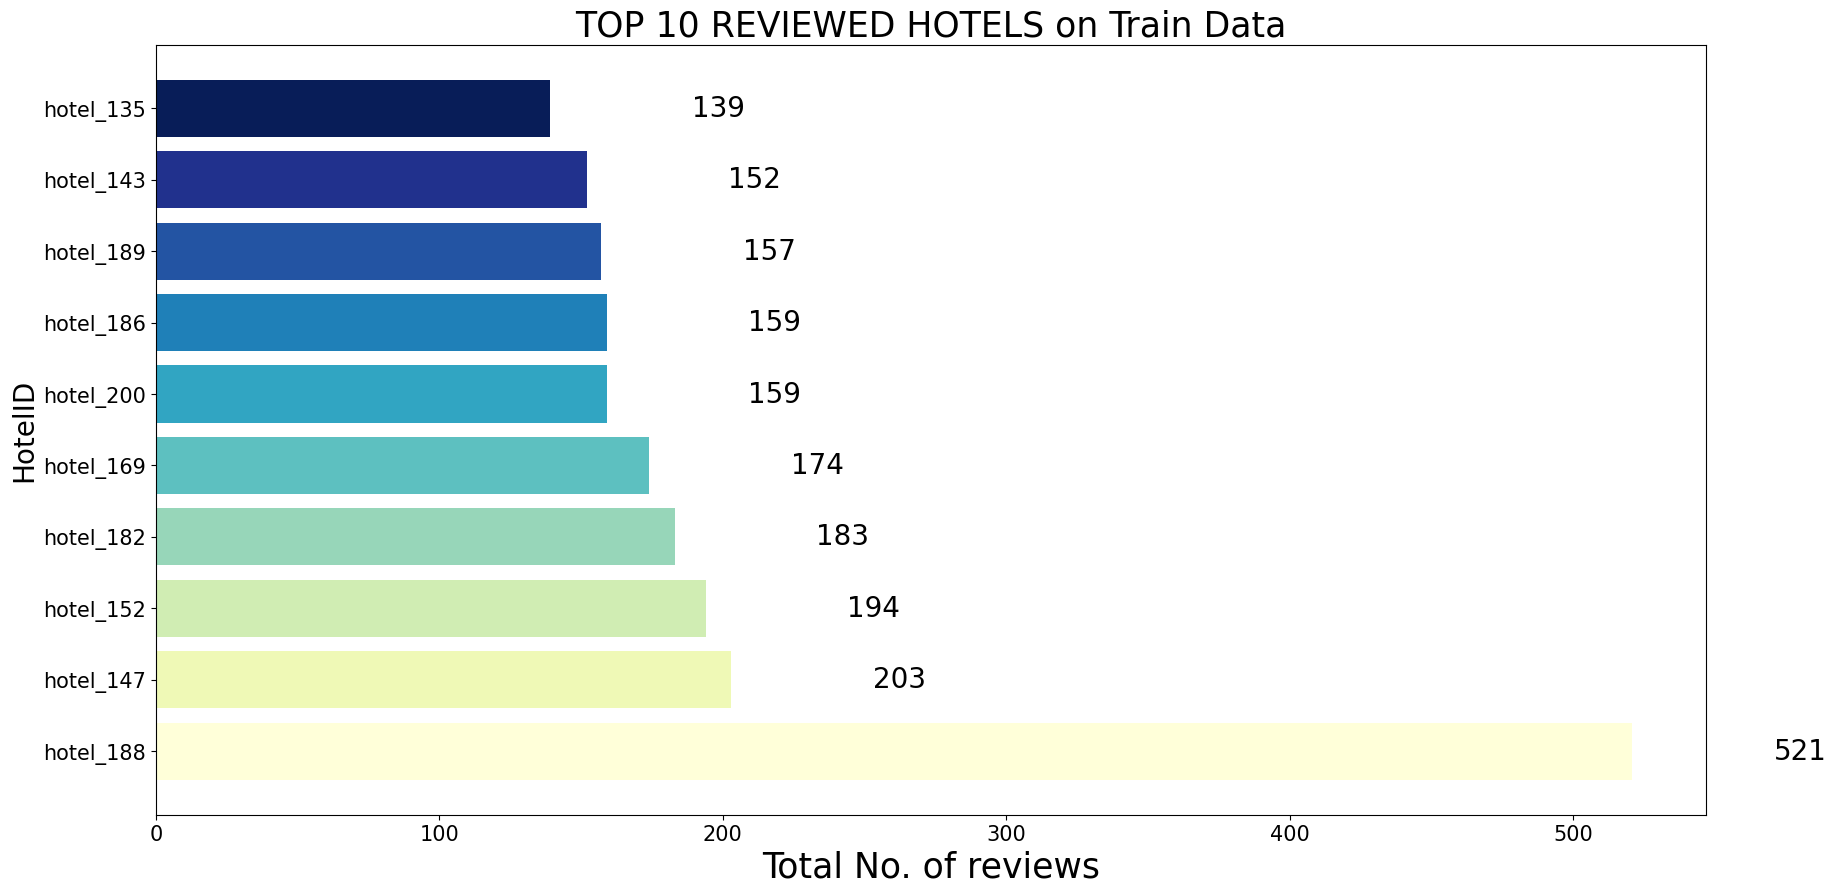

In [10]:
import matplotlib.pyplot as plt

# Get the top 10 reviewed hotels
top_reviewed_hotels = train.Hotelid.value_counts()[:10]

# Plot a horizontal bar chart
fig, ax = plt.subplots(figsize=(20, 10))
ax.barh(top_reviewed_hotels.index, top_reviewed_hotels.values, color=plt.cm.YlGnBu(np.linspace(0, 1, len(top_reviewed_hotels))))
ax.set_title("TOP 10 REVIEWED HOTELS on Train Data", fontsize=25)
ax.set_xlabel('Total No. of reviews', fontsize=25)
ax.set_ylabel('HotelID', fontsize=20)
ax.tick_params(axis='both', labelsize=15)

# Add labels to the bars
for i, v in enumerate(top_reviewed_hotels.values):
    ax.text(v + 50, i, str(v), fontsize=20, color='black', va='center')

plt.show()


In [12]:
### Checking the reviews count with respect to date column
train['Date']=pd.to_datetime(train['Date'])

days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}

train["month"]=train["Date"].dt.month
train["Year"]=train["Date"].dt.year
train["Day"]=train["Date"].dt.day
train["dayOftheweek"] = train["Date"].dt.dayofweek
train['dayOftheweek'] = train['dayOftheweek'].apply(lambda x: days[x])

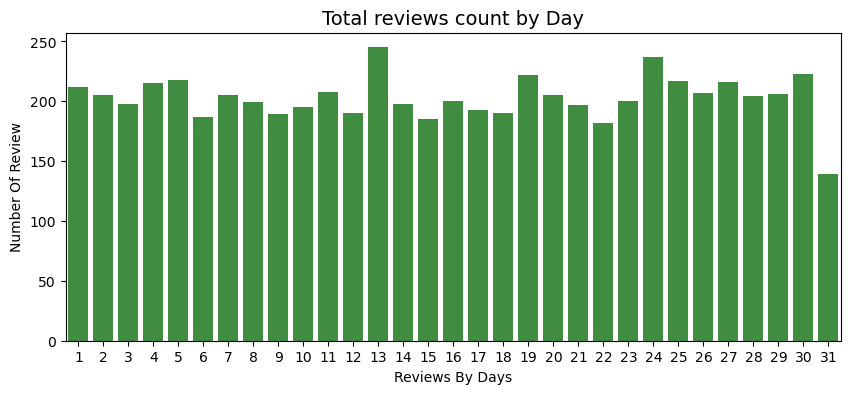

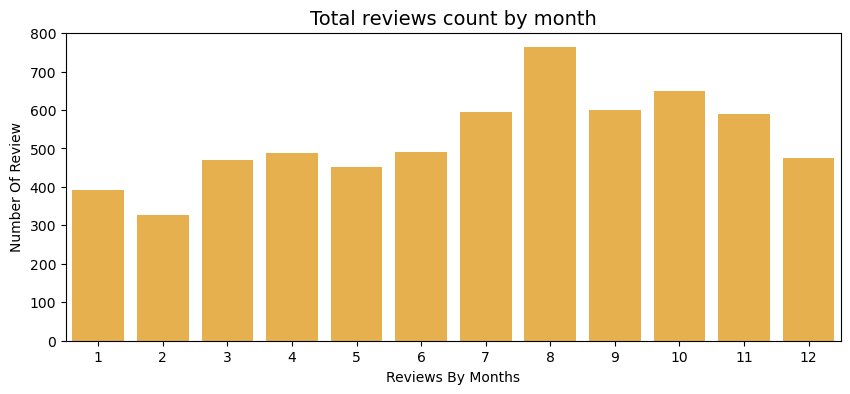

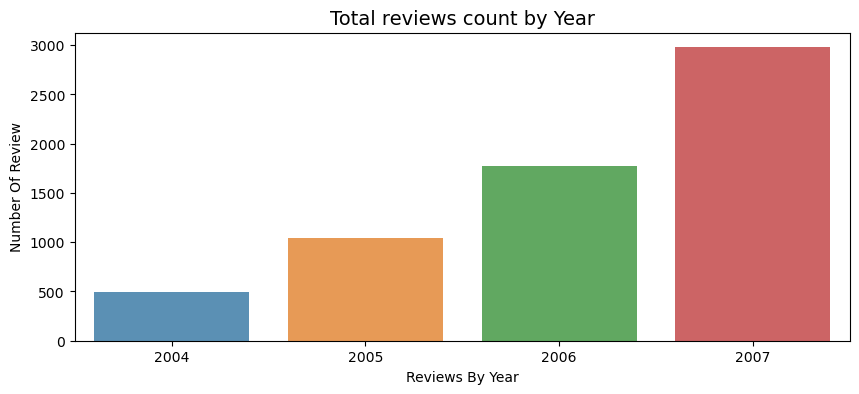

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot total reviews count by day
Review_Day_Count = train['Day'].value_counts()
plt.figure(figsize=(10,4))
sns.barplot(x=Review_Day_Count.index, y=Review_Day_Count.values, alpha=0.8,color='green')
plt.ylabel("Number Of Review")
plt.xlabel("Reviews By Days")
plt.title('Total reviews count by Day', loc='Center', fontsize=14)
plt.show()

# Plot total reviews count by month
Reviews_Count_Month = train['month'].value_counts()
plt.figure(figsize=(10,4))
sns.barplot(x=Reviews_Count_Month.index,y=Reviews_Count_Month.values, alpha=0.8, color='orange')
plt.ylabel("Number Of Review")
plt.xlabel("Reviews By Months")
plt.title('Total reviews count by month', loc='Center', fontsize=14)
plt.show()

# Plot total reviews count by year
Reviews_Year = train['Year'].value_counts()
plt.figure(figsize=(10,4))
sns.barplot(x=Reviews_Year.index,y=Reviews_Year.values, alpha=0.8)
plt.ylabel("Number Of Review")
plt.xlabel("Reviews By Year")
plt.title('Total reviews count by Year', loc='Center', fontsize=14)
plt.show()


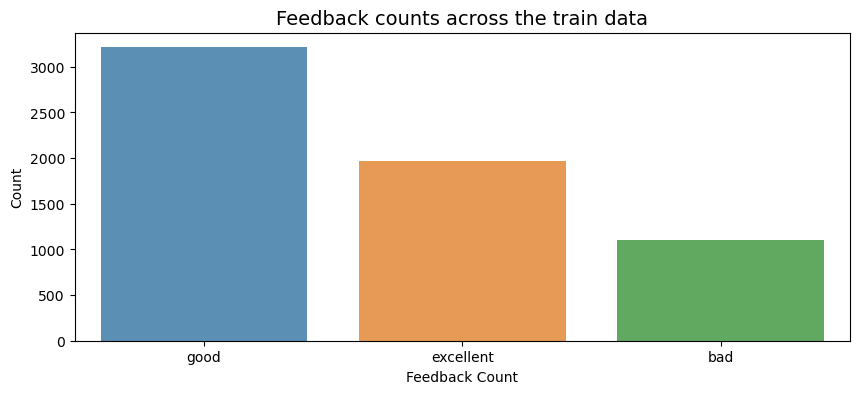

In [46]:
## sentiment analysis across the train data
Sentiment_count = train['Sentiment'].value_counts()
plt.figure(figsize=(10,4))
sns.barplot(x=Sentiment_count.index,y=Sentiment_count.values, alpha=0.8)
plt.ylabel("Count")
plt.xlabel("Feedback Count")
plt.title('Feedback counts across the train data', loc='Center', fontsize=14)
plt.show()

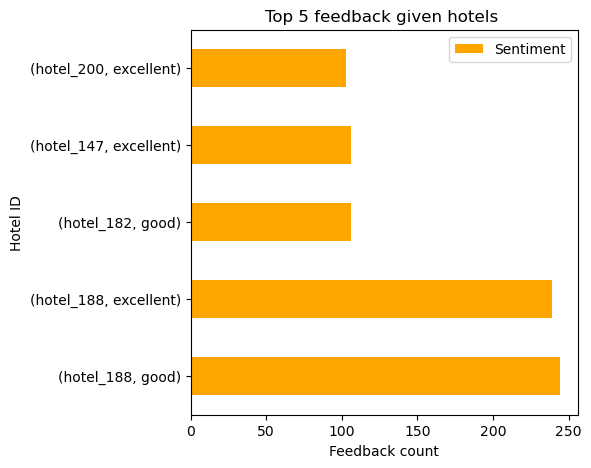

In [15]:
#Top 5 most feedback given hotels
top_fb_hotels = train.groupby('Hotelid')['Sentiment'].value_counts().sort_values(ascending=False).head(5)
top_fb_hotels.plot(kind="barh",color="orange",title="Top 5 feedback given hotels ",legend=True,figsize=(5,5))
_=plt.xlabel('Feedback count')
_=plt.ylabel('Hotel ID')
plt.show()


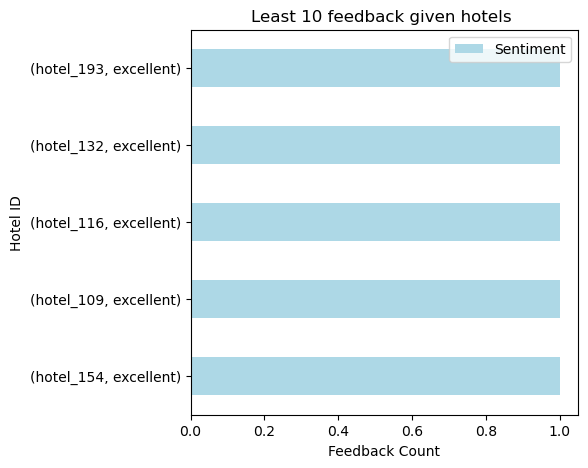

In [16]:
#Least 10 feed back given hotels
least_fb_hotels = train.groupby('Hotelid')['Sentiment'].value_counts().sort_values(ascending=True).head(5)
least_fb_hotels.plot(kind="barh",color="lightblue",title="Least 10 feedback given hotels ",legend=True,figsize=(5,5))
_=plt.xlabel('Feedback Count')
_=plt.ylabel('Hotel ID')
plt.show()

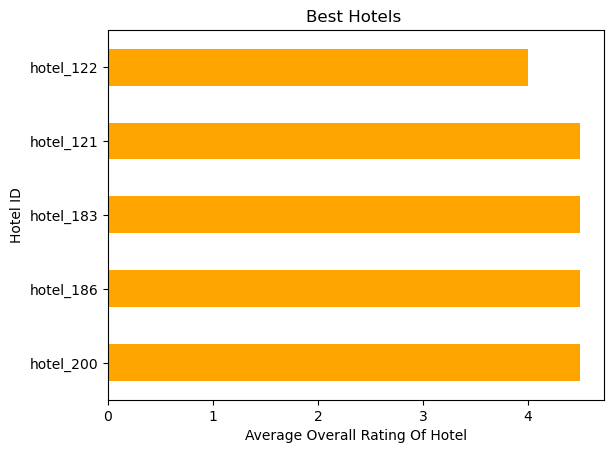

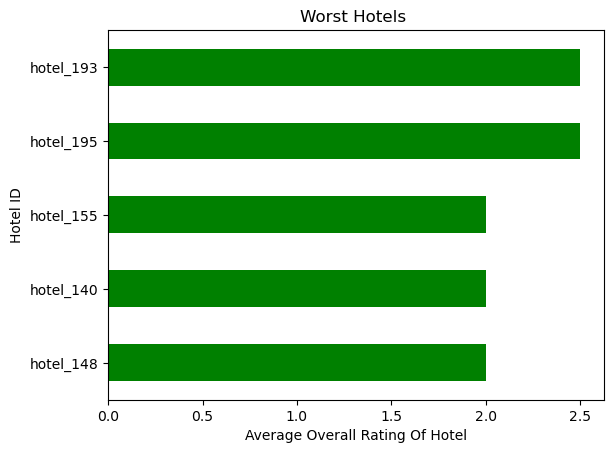

In [26]:
#Trend in summer holidays i.e from April to August are more when compared to all the other months in all the years
###   On existing Hotels Data
exist['AverageOverallRatingOfHotel']=exist['AverageOverallRatingOfHotel'].astype("float64")

#Best Hotels
best_hotels = exist.groupby('Hotelid')['AverageOverallRatingOfHotel'].mean().sort_values(ascending=False).head(5)
best_hotels.plot(kind="barh",color = "orange",title="Best Hotels ")
_=plt.xlabel('Average Overall Rating Of Hotel')
_=plt.ylabel('Hotel ID')
plt.show()

#Worst Hotels
worst_hotels =exist.groupby('Hotelid')['AverageOverallRatingOfHotel'].mean().sort_values(ascending=True).head(5)
worst_hotels.plot(kind="barh",color="green",title="Worst Hotels ")
_=plt.xlabel('Average Overall Rating Of Hotel')
_=plt.ylabel('Hotel ID')
plt.show()



In [36]:
import re
from nltk.corpus import stopwords

# Preprocessing on Train data and Test Data
train["reviewtext"] = train["reviewtext"].apply(lambda x: re.sub("[^A-Za-z]", " ", x.strip()))
test["reviewtext"] = test["reviewtext"].apply(lambda x: re.sub("[^A-Za-z]", " ", x.strip()))

# Convert text to lowercase
train['reviewtext'] = train['reviewtext'].apply(lambda x: " ".join(x.lower() for x in x.split()))
test['reviewtext'] = test['reviewtext'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Remove numbers
train['reviewtext'] = train['reviewtext'].str.replace('[\d]', '', regex=True)
test['reviewtext'] = test['reviewtext'].str.replace('[\d]', '', regex=True)

# Remove punctuation
train['reviewtext'] = train['reviewtext'].str.replace('[^\w\s]','', regex=True)
test['reviewtext'] = test['reviewtext'].str.replace('[^\w\s]','',regex=True)

# Remove stop words
stop = stopwords.words('english')
train['reviewtext'] = train['reviewtext'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
test['reviewtext'] = test['reviewtext'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


In [46]:
### Common word removal
## On trainData
freq = pd.Series(' '.join(train['reviewtext']).split()).value_counts()[:5]
freq = list(freq.index)
train['reviewtext'] = train['reviewtext'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
train['reviewtext'].head()


0                                marriot view king bed
1    charges internet access marriott airport seatt...
2    adequate early morning flight catch choice rig...
3    better average noisy times inthe last several ...
4    ordinary although highly rated reviews pay pre...
Name: reviewtext, dtype: object

In [48]:
## On test Data
freq1 = pd.Series(' '.join(test['reviewtext']).split()).value_counts()[:5]
freq1 = list(freq1.index)
test['reviewtext'] = test['reviewtext'].apply(lambda x: " ".join(x for x in x.split() if x not in freq1))
test['reviewtext'].head()

0    average average nothing standing weather good ...
1    go elsewhere place hugely overpriced mis manag...
2    go back stayed nights booked package marriotts...
3    good weekend wife quite regularly visit seattl...
4    airport lovely indoor pool area looks like lod...
Name: reviewtext, dtype: object

In [49]:
### Rare words removal
### On train Data
freq = pd.Series(' '.join(train['reviewtext']).split()).value_counts()[-5:]
freq = list(freq.index)
train['reviewtext'] = train['reviewtext'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
train['reviewtext'].head()


0                                marriot view king bed
1    charges internet access marriott airport seatt...
2    adequate early morning flight catch choice rig...
3    better average noisy times inthe last several ...
4    ordinary although highly rated reviews pay pre...
Name: reviewtext, dtype: object

In [50]:
## On test Data
freq1 = pd.Series(' '.join(test['reviewtext']).split()).value_counts()[-10:]
freq1 = list(freq1.index)
test['reviewtext'] = test['reviewtext'].apply(lambda x: " ".join(x for x in x.split() if x not in freq1))
test['reviewtext'].head()

0    average average nothing standing weather good ...
1    go elsewhere place hugely overpriced mis manag...
2    go back stayed nights booked package marriotts...
3    good weekend wife quite regularly visit seattl...
4    airport lovely indoor pool area looks like lod...
Name: reviewtext, dtype: object

In [51]:
### Stemming
st = PorterStemmer()
train["reviewtext"] = train['reviewtext'].apply(lambda x: " ".join([st.stem(word)
                                                                    for word in x.split()]))
test["reviewtext"] = test['reviewtext'].apply(lambda x: " ".join([st.stem(word)
                                                                  for word in x.split()]))

In [52]:
### Lemmatization
Lem = WordNetLemmatizer()

train["reviewtext"] = train['reviewtext'].apply(lambda x: " ".join([Lem.lemmatize(word)
                                                                    for word in x.split()]))

test["reviewtext"] = test['reviewtext'].apply(lambda x: " ".join([Lem.lemmatize(word)
                                                                  for word in x.split()]))

In [53]:
### Converting the text data into list
Text_data1 = train['reviewtext'].tolist() 
Text_data2 = test['reviewtext'].tolist()

In [55]:
for i in range(len(Text_data1)):     
    Text_data1[i]=re.sub(r'\s+', ' ', Text_data1[i]) #Removing more than one white spaces in the sentence     
    Text_data1[i]=re.sub('[\d]', ' ',Text_data1[i]) # Removing digits present in each step
    Text_data1[i]=re.sub(r'[^\x00-\x7F]+',' ',Text_data1[i]) #Removing non ASCII characters present in each step
    
Text_data1

for i in range(len(Text_data2)):     
    Text_data2[i]=re.sub(r'\s+', ' ', Text_data2[i])   #Removing more than one white spaces in the sentence       
    Text_data2[i]=re.sub('[\d]', ' ',Text_data2[i])   # Removing digits present in each step
    Text_data2[i]=re.sub(r'[^\x00-\x7F]+','',Text_data2[i]) #Removing non ASCII characters present in each step

Text_data2

['averag averag noth stand weather good recommend eat coin restaur short walk marriott versu eat restaur also eleven block away one need thing typic marriott charg everyth includ internet bother leav wait ride lobbi staff around anyon could walk place bad place noth stand averag either',
 'go elsewher place huge overpr mi manag better place hilton radisson airport area arriv walk endless corridor find key work final got anoth peopl hair bathtub gross small old school pricey yuk',
 'go back stay night book packag marriott web site packag incud delux free park ga card check told readi could give handicap ask look first floor face street park lot went back said wait came back hour later gave key room away origin look face street park lot went back front desk said book delux suppos overlook pool higher floor told delux standard room get nowher front desk went back st floor call phone number marriott reward card explain problem told manag call call went manag offic talk one manag said want 

In [56]:
## Splitting the Data
X_train,X_test,y_train,y_test = train_test_split(Text_data1,train['Sentiment'],test_size=0.3,random_state=124) 

In [57]:
print(y_train.value_counts())
print(y_test.value_counts())


good         2263
excellent    1355
bad           782
Name: Sentiment, dtype: int64
good         950
excellent    616
bad          321
Name: Sentiment, dtype: int64


In [58]:
## Creating a Tfidf Matrix
tfidf_transformer = TfidfVectorizer(ngram_range=(1,1),stop_words='english',max_features=350)
X_train_tfidf = tfidf_transformer.fit_transform(X_train)
print(X_train_tfidf.shape)
# Get the tfidf matrix for test documents
X_test_tfidf = tfidf_transformer.transform(X_test) 
print(X_test_tfidf.shape)

test_tfidf=tfidf_transformer.transform(Text_data2)

(4400, 350)
(1887, 350)


In [60]:
## MODEL BUILDING

## Navie Bayes model
nb_clf = MultinomialNB().fit(X_train_tfidf,y_train) 
prediction_train = nb_clf.predict(X_train_tfidf)  
prediction_test = nb_clf.predict(X_test_tfidf) #predict on test data 

print(accuracy_score(y_train,prediction_train)) 
print(accuracy_score(y_test,prediction_test))

0.6356818181818182
0.5908850026497086


In [61]:
## LOGISTIC REGRESSION
logmod=LogisticRegression()

logmod.fit(X_train_tfidf,y_train)

pred_train_log = logmod.predict(X_train_tfidf)
pred_test_log = logmod.predict(X_test_tfidf)
test_pred = logmod.predict(test_tfidf)

print("Accuracy on train is:",accuracy_score(y_train,pred_train_log))
print("Accuracy on test is:",accuracy_score(y_test,pred_test_log))


Accuracy on train is: 0.7202272727272727
Accuracy on test is: 0.649178590355061


In [65]:
## DECISION TREES
dtc = DecisionTreeClassifier()
dtc.fit(X_train_tfidf,y_train)

pred_train_dt = dtc.predict(X_train_tfidf)
pred_test_dt = dtc.predict(X_test_tfidf)

print("Accuracy on train is:",accuracy_score(y_train,pred_train_dt))

print("Accuracy on test is:",accuracy_score(y_test,pred_test_dt))

Accuracy on train is: 0.9870454545454546
Accuracy on test is: 0.5087440381558028


In [80]:
### Preprocessing on Existing Hotels Data and New Hotels Data and Verifying the NULL values
print("__________On existing hotels data _______________")
print(exist.isnull().sum().sort_values(ascending=True))
print("__________On New hotels data _______________")
print(New.isnull().sum().sort_values(ascending=True))

__________On existing hotels data _______________
Hotelid                        0
AvgPricing                     0
AverageOverallRatingOfHotel    0
Businessservice_rating         0
Service_rating                 0
Checkin_rating                 0
Cleanliness_rating             0
0_AvgPricing                   0
Location_rating                0
Value_rating                   0
HelpfulToNoOfreaders           0
NoOfReaders                    0
Date                           0
reviewtext                     0
userid                         0
Rooms_rating                   0
1_AvgPricing                   0
dtype: int64
__________On New hotels data _______________
Hotelid                        0
AvgPricing                     0
AverageOverallRatingOfHotel    0
Businessservice_rating         0
Service_rating                 0
Checkin_rating                 0
Cleanliness_rating             0
0_AvgPricing                   0
Location_rating                0
Value_rating                   0
H

In [81]:
#### Separating the Averagepricing Column
exist=exist.join(exist['AveragePricing'].str.split('$', 1, expand=True).rename(columns={ 1:'AvgPricing'}))
exist = exist.drop(0,axis=1)

New=New.join(New['AveragePricing'].str.split('$', 1, expand=True).rename(columns={ 1:'AvgPricing'}))
New = New.drop(0,axis=1)

KeyError: 'AveragePricing'

In [83]:
#### Creating a LengthOfReview Column
exist['LengthofReview'] = exist['reviewtext'].apply(lambda x: len(str(x).split(" ")))

New['LengthofReview'] = New['reviewtext'].apply(lambda x: len(str(x).split(" ")))

In [84]:
#### Dropping the unnecessary columns
exist = exist.drop(["Date","userid","reviewtext","AveragePricing"],axis=1)
New = New.drop(["Date","userid","reviewtext","AveragePricing"],axis=1)

KeyError: "['AveragePricing'] not found in axis"

In [85]:
#### Verifying the datatypes
print("___________Existing hotels Dtypes____________")
print(exist.dtypes)

print("___________New hotels Dtypes____________")
print(New.dtypes)


___________Existing hotels Dtypes____________
Hotelid                         object
userid                          object
reviewtext                      object
Date                            object
NoOfReaders                      int64
HelpfulToNoOfreaders             int64
Value_rating                     int64
Rooms_rating                     int64
Location_rating                  int64
Cleanliness_rating               int64
Checkin_rating                   int64
Service_rating                   int64
Businessservice_rating           int64
AverageOverallRatingOfHotel    float64
AvgPricing                      object
0_AvgPricing                    object
1_AvgPricing                    object
LengthofReview                   int64
dtype: object
___________New hotels Dtypes____________
Hotelid                         object
userid                          object
reviewtext                      object
Date                            object
NoOfReaders                      int64
He

In [88]:
#### Datatypes conversion
exist["AvgPricing"] = exist["AvgPricing"].astype("float64")
New["AvgPricing"] = New["AvgPricing"].astype("float64")

#### Verifying the unique values count on the data
print("___________Unique values count on existing hotels___________")
unique_counts = pd.DataFrame.from_records([(col, exist[col].nunique()) for col in exist.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
print(unique_counts)


print("___________Unique values count on New hotels___________")
unique_counts = pd.DataFrame.from_records([(col, New[col].nunique()) for col in New.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
print(unique_counts)

___________Unique values count on existing hotels___________
                    Column_Name  Num_Unique
15                 0_AvgPricing           1
8               Location_rating           6
13  AverageOverallRatingOfHotel           6
6                  Value_rating           6
7                  Rooms_rating           6
9            Cleanliness_rating           6
10               Checkin_rating           6
11               Service_rating           6
12       Businessservice_rating           6
5          HelpfulToNoOfreaders          36
4                   NoOfReaders          48
14                   AvgPricing          66
16                 1_AvgPricing          66
0                       Hotelid          75
17               LengthofReview         620
3                          Date        1696
1                        userid        7313
2                    reviewtext        7504
___________Unique values count on New hotels___________
                    Column_Name  Num_Unique
15 

In [96]:
### Feature Engineering
#### On Existing hotels Data
MR = exist.groupby(['Hotelid']).mean().reset_index()
MR.drop(['NoOfReaders',"HelpfulToNoOfreaders"],axis=1, inplace=True)

MR1 = pd.DataFrame(exist.groupby('Hotelid')['NoOfReaders',"HelpfulToNoOfreaders"].sum().reset_index())
Existing_Hotels = pd.merge(MR1,MR,on=['Hotelid','Hotelid'])


C:\Users\user\AppData\Local\Temp\ipykernel_5320\1195578207.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  MR = exist.groupby(['Hotelid']).mean().reset_index()
C:\Users\user\AppData\Local\Temp\ipykernel_5320\1195578207.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  MR1 = pd.DataFrame(exist.groupby('Hotelid')['NoOfReaders',"HelpfulToNoOfreaders"].sum().reset_index())


In [97]:
#### On New Hotels Data
MR2 = New.groupby(['Hotelid']).mean().reset_index()
MR2.drop(['NoOfReaders',"HelpfulToNoOfreaders"],axis=1, inplace=True)
MR3 = pd.DataFrame(New.groupby('Hotelid')['NoOfReaders',"HelpfulToNoOfreaders"].sum().reset_index())

New_Hotels = pd.merge(MR2,MR3,on=['Hotelid','Hotelid'])


C:\Users\user\AppData\Local\Temp\ipykernel_5320\1904391275.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  MR2 = New.groupby(['Hotelid']).mean().reset_index()
C:\Users\user\AppData\Local\Temp\ipykernel_5320\1904391275.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  MR3 = pd.DataFrame(New.groupby('Hotelid')['NoOfReaders',"HelpfulToNoOfreaders"].sum().reset_index())


In [98]:
#### Drop the Hotelid Column
Existing_Hotels = Existing_Hotels.drop("Hotelid",axis=1)
New_Hotels = New_Hotels.drop("Hotelid",axis=1)

In [103]:
# CLUSTERING
#### Standardizing the data
std = StandardScaler()
std.fit(Existing_Hotels)
X_train_std= std.transform(Existing_Hotels)
X_test_std= std.transform(New_Hotels)

#### KMEANS Model
kmeans = KMeans(n_clusters=2,random_state=99999)
kmeans = kmeans.fit(X_train_std)

labels_train = kmeans.predict(X_train_std)
labels_test = kmeans.predict(X_test_std)

# Centroid values
centroids = kmeans.cluster_centers_

## Checking the values
centroids


C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([[ 0.17020181,  0.16887951,  0.45207484,  0.42794809,  0.28561533,
         0.46685561,  0.34779782,  0.43138425,  0.20903525,  0.39615415,
         0.21591802, -0.1681404 ],
       [-0.46805497, -0.46441865, -1.24320582, -1.17685725, -0.78544215,
        -1.28385294, -0.956444  , -1.18630668, -0.57484694, -1.08942392,
        -0.59377456,  0.46238611]])

In [104]:
labels_train

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0])

In [105]:
labels_test

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0])

In [106]:
print(kmeans.cluster_centers_)
print(kmeans.inertia_)

[[ 0.17020181  0.16887951  0.45207484  0.42794809  0.28561533  0.46685561
   0.34779782  0.43138425  0.20903525  0.39615415  0.21591802 -0.1681404 ]
 [-0.46805497 -0.46441865 -1.24320582 -1.17685725 -0.78544215 -1.28385294
  -0.956444   -1.18630668 -0.57484694 -1.08942392 -0.59377456  0.46238611]]
626.2831957272008


C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

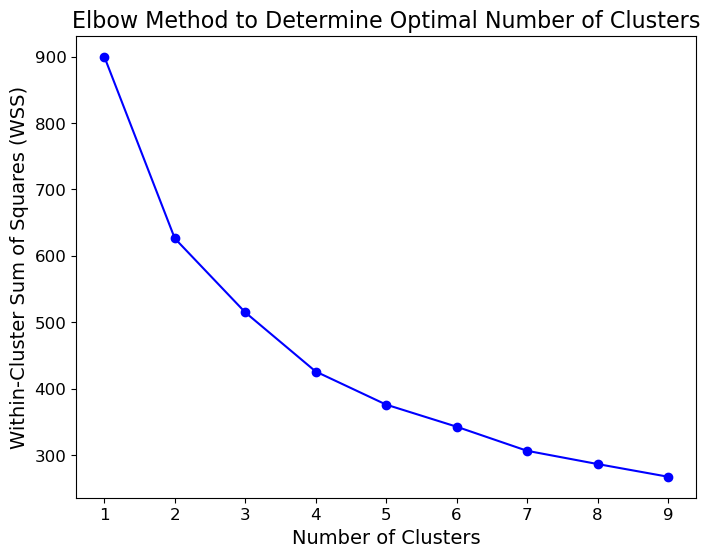

In [108]:
####  Checking For Various Values of K
wss= {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_train_std)
    clusters = kmeans.labels_
    wss[k] = kmeans.inertia_
    
import matplotlib.pyplot as plt
import os
os.environ['OMP_NUM_THREADS'] = '1'

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(8,6))

# Plot WSS values
ax.plot(list(wss.keys()), list(wss.values()), marker='o', color='blue')

# Set axis labels and title
ax.set_xlabel("Number of Clusters", fontsize=14)
ax.set_ylabel("Within-Cluster Sum of Squares (WSS)", fontsize=14)
ax.set_title("Elbow Method to Determine Optimal Number of Clusters", fontsize=16)

# Set tick label size
ax.tick_params(labelsize=12)

# Show plot
plt.show()


In [110]:
#### KMEANS Model with "K" value
kmeans = KMeans(n_clusters=5,random_state=9999)

kmeans.fit(Existing_Hotels)

Existing_Hotels["cluster"] = kmeans.predict(Existing_Hotels)
New_Hotels["cluster"] = kmeans.predict(New_Hotels)

# Centroid values
centroids = kmeans.cluster_centers_
print("centroids",centroids)

#### Checking for cluster Stability
indices=Existing_Hotels.sample(frac=0.8,random_state=123).index
print("indices",indices)

#### Subsetting 80% of train data
Alpha = Existing_Hotels.loc[indices,:]
Alpha.shape

kmeans = KMeans(n_clusters=5,random_state=45)
kmeans2=kmeans.fit(Alpha)
print("len of kmeans2.labels",len(kmeans2.labels_))
Alpha['cluster']=kmeans2.labels_

g1=Existing_Hotels.loc[indices,'cluster']
g2=Alpha.cluster

#### Cluster Stability
adjusted_rand_score(g1,g2)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\AppData\Local\Temp\ipykernel_5320\1795990383.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_Hotels["cluster"] = kmeans.predict(New_Hotels)
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870

centroids [[ 9.35263158e+01  7.24210526e+01  3.73815067e+00  3.68922832e+00
   3.59999104e+00  3.89175619e+00  3.41998588e+00  3.60694222e+00
   2.52223494e+00  3.25000000e+00  1.75368421e+02  1.59030521e+02
  -4.44089210e-16]
 [ 1.23060000e+03  9.60400000e+02  4.20501386e+00  4.33013011e+00
   3.89684252e+00  4.47343427e+00  3.75342756e+00  4.24659660e+00
   2.57222477e+00  4.00000000e+00  3.07600000e+02  1.74586870e+02
   1.00000000e+00]
 [ 3.03100000e+03  2.68400000e+03  4.21479374e+00  4.12091038e+00
   3.49359886e+00  4.43527738e+00  3.25177809e+00  4.19914651e+00
   2.16500711e+00  4.00000000e+00  3.60000000e+02  1.65318634e+02
   2.00000000e+00]
 [ 6.63625000e+02  5.19375000e+02  3.91046148e+00  4.07019218e+00
   3.89917083e+00  4.19853349e+00  3.66616828e+00  4.02734898e+00
   2.53406001e+00  3.75000000e+00  3.18875000e+02  1.66118811e+02
   3.00000000e+00]
 [ 3.22956522e+02  2.55608696e+02  3.94559348e+00  3.95070813e+00
   3.72810696e+00  4.18931926e+00  3.57689700e+00  3.975

0.9407254875415934

In [111]:
print("__________On user ratings data _______________")
print(ratings.isnull().sum().sort_values(ascending=True))

__________On user ratings data _______________
userid           0
Hotelid          0
OverallRating    0
dtype: int64


In [112]:
#### Verifying the unique counts on the data
print("___________Unique values count on existing hotels___________")
unique_counts = pd.DataFrame.from_records([(col, ratings[col].nunique()) for col in ratings.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
print(unique_counts)

___________Unique values count on existing hotels___________
     Column_Name  Num_Unique
2  OverallRating           5
1        Hotelid         130
0         userid        5010


In [113]:
# calculating the mean ratings for each hotel
  
rating = pd.DataFrame(ratings.groupby('Hotelid')['OverallRating'].count())  
rating["ratings_count"] = rating["OverallRating"]
rating=rating.drop("OverallRating",axis=1)

# sorting based on count of ratings that each hotelId got  
rating.sort_values('ratings_count', ascending=False).head()

,ratings_count
Hotelid,
hotel_608,2489
hotel_557,2487
hotel_555,2487
hotel_552,2487
hotel_620,2487


In [114]:
## Creating a Pivot table
# Preparing data table for analysis  
  
ratings_pivot = ratings.pivot_table(values='OverallRating', index='userid', columns='Hotelid')  
ratings_pivot.head()

Hotelid,hotel_501,hotel_502,hotel_503,hotel_504,hotel_506,hotel_507,hotel_508,hotel_509,hotel_510,hotel_511,...,hotel_630,hotel_631,hotel_632,hotel_633,hotel_634,hotel_635,hotel_636,hotel_637,hotel_639,hotel_640
userid,,,,,,,,,,,,,,,,,,,,,
user_21002,NaN,3.0,NaN,3.0,3.0,NaN,4.0,NaN,3.0,NaN,...,4.0,NaN,NaN,3.0,NaN,NaN,NaN,3.0,NaN,NaN
user_21025,NaN,NaN,NaN,2.0,NaN,NaN,NaN,3.0,3.0,2.0,...,NaN,2.0,NaN,NaN,4.0,2.0,NaN,NaN,3.0,3.0
user_21042,NaN,NaN,NaN,NaN,4.0,NaN,3.0,NaN,3.0,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,2.0,NaN
user_21051,NaN,2.0,5.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,5.0,5.0,NaN,NaN,5.0,5.0,5.0,5.0,NaN,5.0
user_21054,NaN,1.0,NaN,1.0,NaN,3.0,4.0,2.0,NaN,4.0,...,4.0,NaN,NaN,NaN,3.0,2.0,1.0,2.0,4.0,4.0


In [115]:
X = ratings_pivot["hotel_506"]  

### Checking correlation for a Hotelid
Corr = pd.DataFrame(ratings_pivot.corrwith(X)) 
Corr.rename(columns={0: 'corr'}, inplace=True)
Corr.head()

,corr
Hotelid,
hotel_501,-0.154203
hotel_502,0.281131
hotel_503,0.373025
hotel_504,0.267348
hotel_506,1.000000


In [116]:
#### Joining the two required columns
Final_summary = Corr.join(rating)
##Finding the most similar Hotels
Final_summary.sort_values('corr', ascending=False).head(10)

,corr,ratings_count
Hotelid,,
hotel_506,1.000000,2471
hotel_621,0.545000,51
hotel_565,0.527932,56
hotel_600,0.517389,60
hotel_569,0.516148,67
hotel_536,0.480194,2334
hotel_634,0.456892,2460
hotel_613,0.452657,55
hotel_547,0.449589,2370


In [117]:
#PEARSON CORRELATION
corr_matrix = ratings_pivot.corr(method="pearson")
corr_matrix.head()

Hotelid,hotel_501,hotel_502,hotel_503,hotel_504,hotel_506,hotel_507,hotel_508,hotel_509,hotel_510,hotel_511,...,hotel_630,hotel_631,hotel_632,hotel_633,hotel_634,hotel_635,hotel_636,hotel_637,hotel_639,hotel_640
Hotelid,,,,,,,,,,,,,,,,,,,,,
hotel_501,1.000000e+00,5.934392e-17,0.185636,0.252474,-0.154203,0.338617,0.414362,0.132333,0.253705,-0.049533,...,-0.064299,0.358815,0.430519,0.698088,-0.098485,0.506621,0.281914,0.398728,0.525561,0.576390
hotel_502,5.934392e-17,1.000000e+00,0.382130,0.447061,0.281131,0.177124,0.253560,0.230751,0.369972,0.294717,...,0.141115,0.419405,0.385323,0.244881,0.294456,0.418357,0.336370,0.323143,0.270584,0.336216
hotel_503,1.856364e-01,3.821298e-01,1.000000,0.452617,0.373025,0.292880,0.444542,0.399184,0.482901,0.385462,...,0.254169,0.389959,0.405605,0.475923,0.389994,0.393871,0.449530,0.455853,0.313742,0.462383
hotel_504,2.524737e-01,4.470612e-01,0.452617,1.000000,0.267348,0.271811,0.303775,0.298945,0.414893,0.406640,...,0.215417,0.380266,0.362473,0.443224,0.355919,0.401712,0.390907,0.431199,0.309825,0.412595
hotel_506,-1.542028e-01,2.811308e-01,0.373025,0.267348,1.000000,0.420583,0.371972,0.391558,0.389412,0.410366,...,0.409223,0.345099,0.377968,0.335522,0.456892,0.310593,0.322108,0.413220,0.323251,0.328215


In [120]:
#Recommend to users
ratings_pivot.iloc[10].dropna().head()

Hotelid
hotel_503    1.0
hotel_504    1.0
hotel_506    5.0
hotel_509    5.0
hotel_510    1.0
Name: user_21117, dtype: float64

In [122]:
## list of all Hotels with all correlations multiplied by ratings (integers from 1 to 5). 
user_corr = pd.Series()

userid=10

for Hotelid in ratings_pivot.iloc[userid].dropna().index:
    corr_list = corr_matrix[Hotelid].dropna()*ratings_pivot.iloc[userid][Hotelid]
    user_corr = user_corr.append(corr_list)
    
## Grouping hotels to prevent from duplicate values
user_corr = user_corr.groupby(user_corr.index).sum()
user_corr.head()

C:\Users\user\AppData\Local\Temp\ipykernel_5320\4193659804.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  user_corr = pd.Series()
C:\Users\user\AppData\Local\Temp\ipykernel_5320\4193659804.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_corr = user_corr.append(corr_list)
C:\Users\user\AppData\Local\Temp\ipykernel_5320\4193659804.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_corr = user_corr.append(corr_list)
C:\Users\user\AppData\Local\Temp\ipykernel_5320\4193659804.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_corr = user_corr.append(corr_list)
C:\Users\user\AppData\Loc

hotel_501    24.364090
hotel_502    52.088711
hotel_503    63.439687
hotel_504    58.613837
hotel_506    64.939163
dtype: float64

In [123]:
## list of Hotels Visited to drop 
Hotels_list = []
for i in range(len(ratings_pivot.iloc[userid].dropna().index)):
    if ratings_pivot.iloc[userid].dropna().index[i] in user_corr:
        Hotels_list.append( ratings_pivot.iloc[userid].dropna().index[i])
    else:
        pass

user_corr = user_corr.drop(Hotels_list)

In [125]:
print("\n Hotels which you have visited the most \n")
for i in ratings_pivot.iloc[userid].dropna().index:
    print(i)
print("\n Suggested Hotels: \n")
for i in user_corr.sort_values(ascending=False).index[:5]:
    print(i)


 Hotels which you have visited the most 

hotel_503
hotel_504
hotel_506
hotel_509
hotel_510
hotel_511
hotel_513
hotel_514
hotel_519
hotel_521
hotel_522
hotel_526
hotel_527
hotel_532
hotel_533
hotel_534
hotel_536
hotel_538
hotel_539
hotel_541
hotel_543
hotel_544
hotel_545
hotel_550
hotel_551
hotel_552
hotel_553
hotel_555
hotel_557
hotel_559
hotel_563
hotel_566
hotel_573
hotel_574
hotel_575
hotel_583
hotel_584
hotel_594
hotel_595
hotel_596
hotel_597
hotel_598
hotel_599
hotel_602
hotel_605
hotel_607
hotel_610
hotel_612
hotel_615
hotel_617
hotel_618
hotel_619
hotel_620
hotel_623
hotel_625
hotel_626
hotel_627
hotel_629
hotel_635
hotel_640

 Suggested Hotels: 

hotel_634
hotel_564
hotel_549
hotel_529
hotel_568
